# Data cleaning 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import category_encoders as ce

#### View all hidden columns in dataframe

In [2]:
pd.options.display.max_columns=100

#### Load train data set and labels

In [3]:
train_set=pd.read_csv("C:/Users/P.Thukaraka/Downloads/TrainingSetValues.csv")
train_labels=pd.read_csv("C:/Users/P.Thukaraka/Downloads/TrainingSetLabels.csv")
test_set=pd.read_csv("C:/Users/P.Thukaraka/Downloads/TestSetValues.csv")

In [4]:
test_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,04-02-13,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,04-02-13,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,01-02-13,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,22-01-13,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,27-03-13,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,24-02-11,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,21-03-11,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,04-03-13,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,18-02-13,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [5]:
train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


#### Changing index for both dataframes with id

In [7]:
train_set.set_index('id',inplace=True)  
train_labels.set_index('id',inplace=True)  

In [8]:
df = pd.merge(train_labels, train_set, how = 'inner', left_index = True,right_index=True) 

#### Setting a new index

In [9]:
df.reset_index(inplace=True) 

In [10]:
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

#### To check the null values of each columns

In [12]:
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [13]:
df.describe() 

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


#### To check whether the data set is balanced

In [14]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Considering scheme_management / management / management_group columns

In [15]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [16]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [17]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [18]:
df.groupby(['management_group','management']).count()

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   num_private  basin  subvillage  region  \
management_group management                                                 
commercial       company                   685    685         685     685   
                 private operator         1971   1971        1932    1971   
                 trust                      78     78          78      78   
                 water authority           904    904         895     904   
other            other                     844    844         839     844   
                 other - school             99     99          99      99   
parastatal       parastatal               1768   1768        1768    1768   
unknown          unknown                   561    561         561     561   
user-group       vwc                     40507  40507       40189   40507   
                 water board              2933   2933        2933    2933   
                 

### Considering quantity/quantity_group

In [19]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [20]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

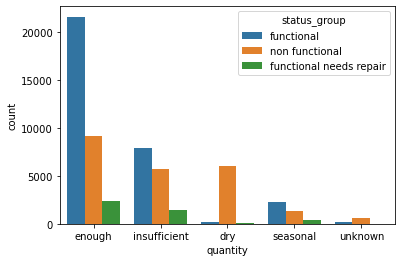

In [21]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

### Considering source / source_type / source_class columns

In [22]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [23]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [24]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [25]:
df.groupby(['source_class','source']).count()

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10252       11075   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11075   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   num_private  basin  subvillage  region  \
source_class source                                                         
groundwater  hand dtw                      874    874         874     874   
             machine dbh                 11075  11075       10849   11075   
             shallow well                16824  16824       16817   16824   
             spring                      17021  17021       16886   17021   
surface      dam                           656    656         656     656   
             lake                          765    765         764     765   
             rainwater harvesting         2295   2295        2293    2295   
             river                        9612   9612        9612    9612   
unknown      other                         212    212         212     212   
             unknown                        66     66          66      66   

                                   region_code  district_code    lga   ward  \
source_class source                                                           
groundwater  hand dtw                      874            874    874    874   
             machine dbh                 11075          11075  11075  11075   
             shallow well                16824          16824  16824  16824   
             spring                      17021          17021  

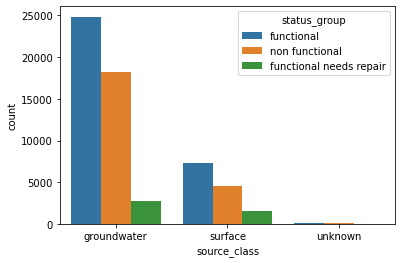

In [26]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

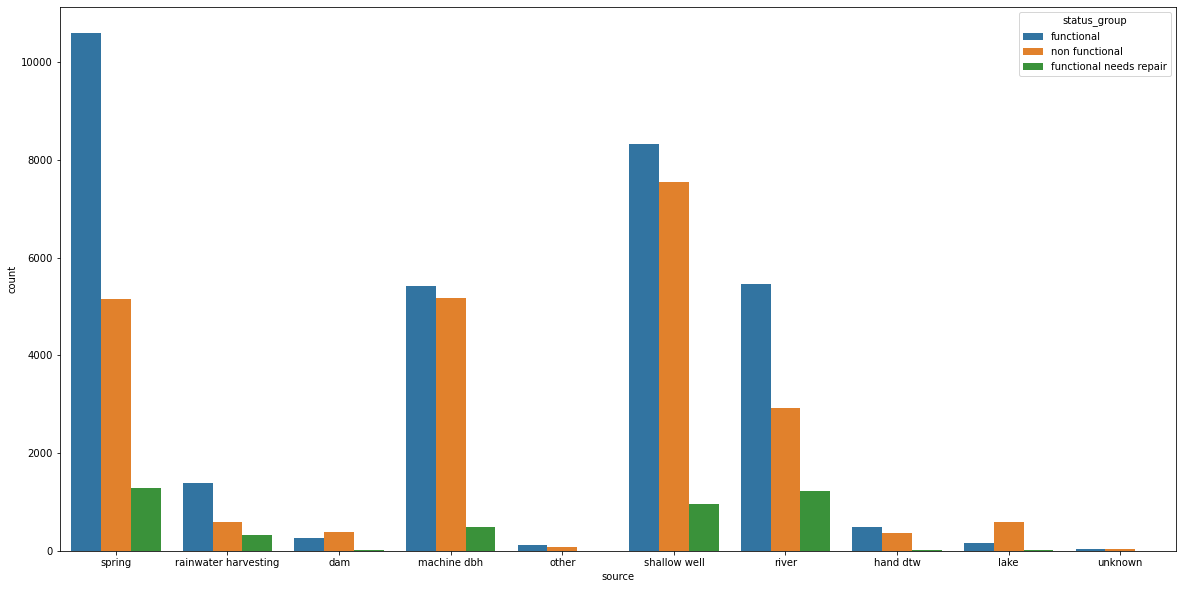

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

### Considering water_quality / quality_group columns

In [28]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [29]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

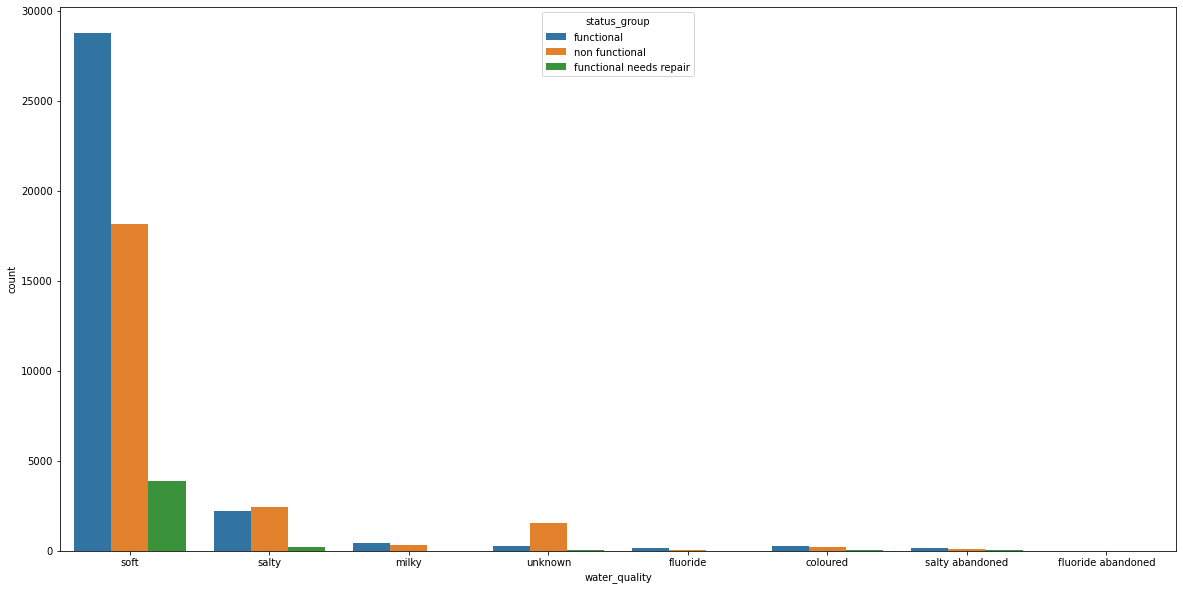

In [30]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

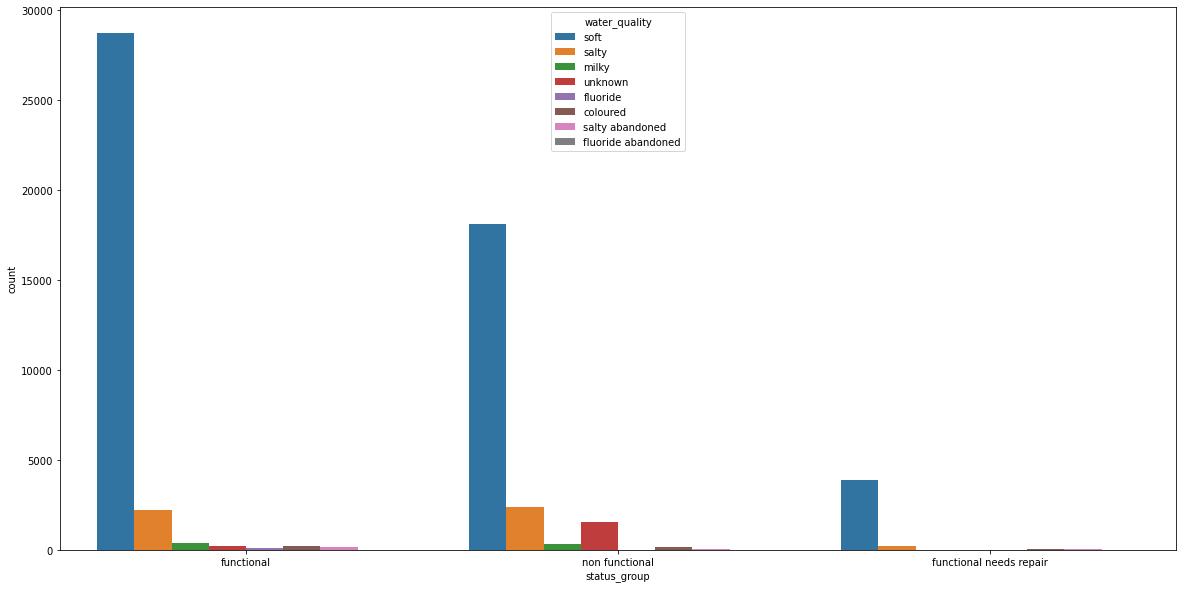

In [31]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

### Considering payment / payment_type columns

In [32]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [33]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

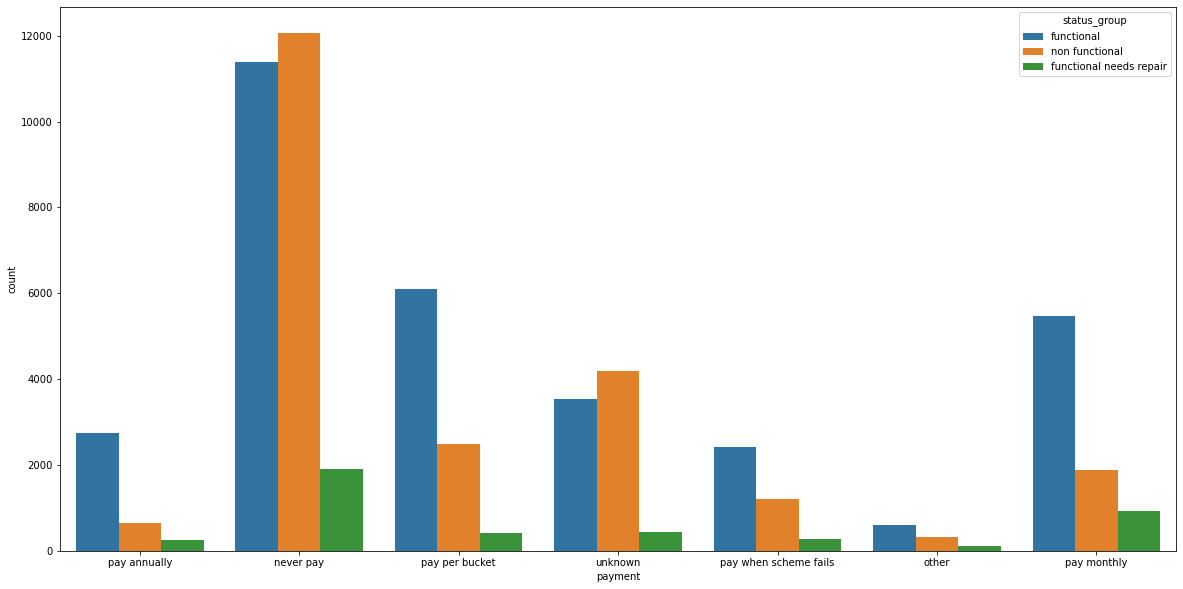

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

### Considering extraction_type / extraction_type_group / extraction_type_class columns

In [35]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [36]:
df['extraction_type_group'].value_counts()


gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [37]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [38]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
 

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26780        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                    

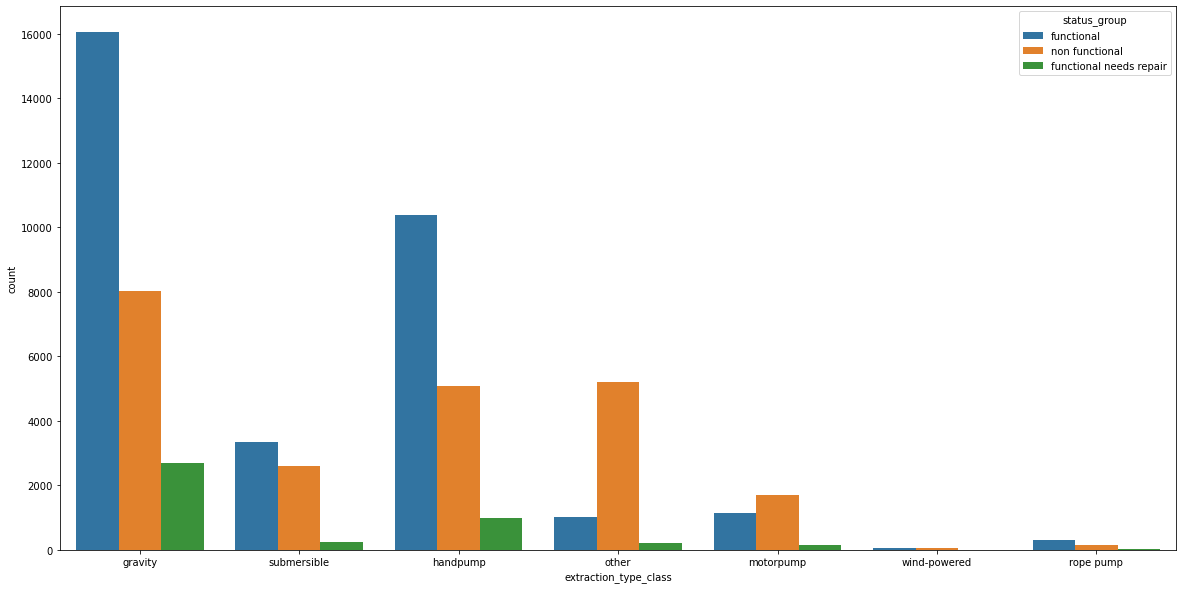

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)


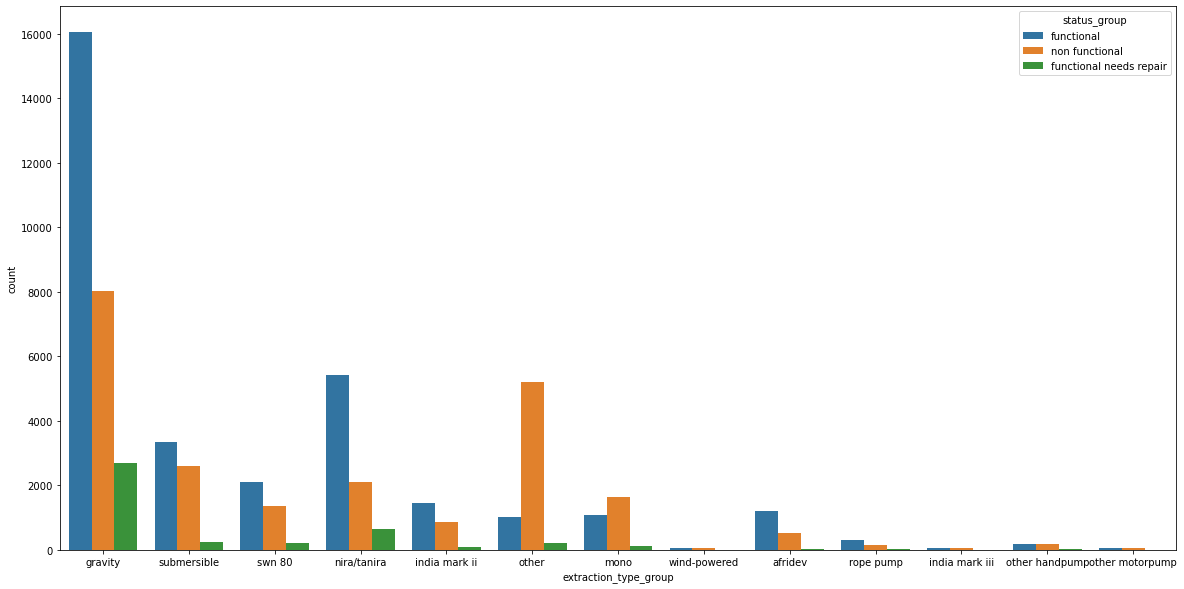

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

### Considering waterpoint_type / waterpoint_type_group

In [41]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [42]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

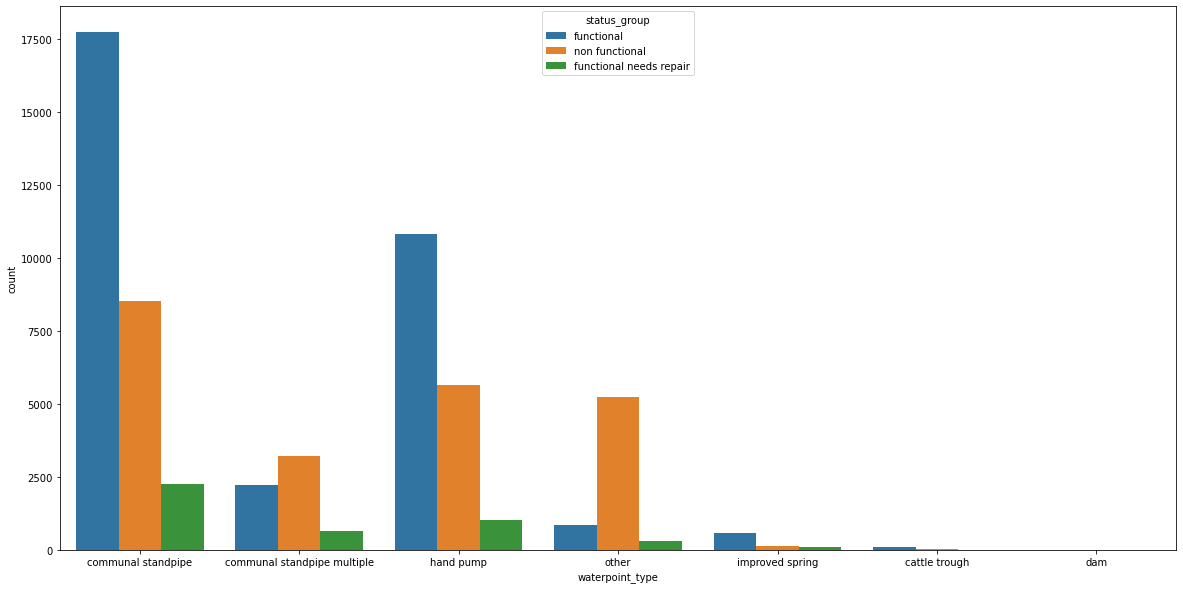

In [43]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

#### Droping similar columns identified from exploring in training set and test set 

In [44]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )
test_set.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True)

###  Considering construction_year 

In [45]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [46]:
df['decade'] = df['construction_year']
test_set['decade'] = test_set['construction_year']

#### Converting year to decade

In [47]:
df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [48]:
test_set['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
test_set['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
test_set['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
test_set['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
test_set['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
test_set['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [49]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [50]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [51]:
test_set.loc[df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,9689.000000,9689.000000,9689.000000,9689.000000,9.689000e+03,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000
mean,37123.736609,332.812127,649.944473,34.094571,-5.696909e+00,0.427908,15.216225,5.696770,183.759728,1289.649190
std,21326.542027,2890.062889,691.614291,6.539647,2.938052e+00,9.193252,17.368653,9.771888,476.902245,955.230214
min,37.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18899.000000,0.000000,0.000000,33.073186,-8.425026e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37220.000000,0.000000,337.000000,34.910234,-5.084846e+00,0.000000,12.000000,3.000000,15.000000,1986.000000
75%,55818.000000,20.000000,1308.000000,37.209852,-3.320936e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74248.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,63.000000,11469.000000,2013.000000


In [52]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [53]:
test_set['construction_year'].replace(to_replace = 0, value = 1986, inplace=True)

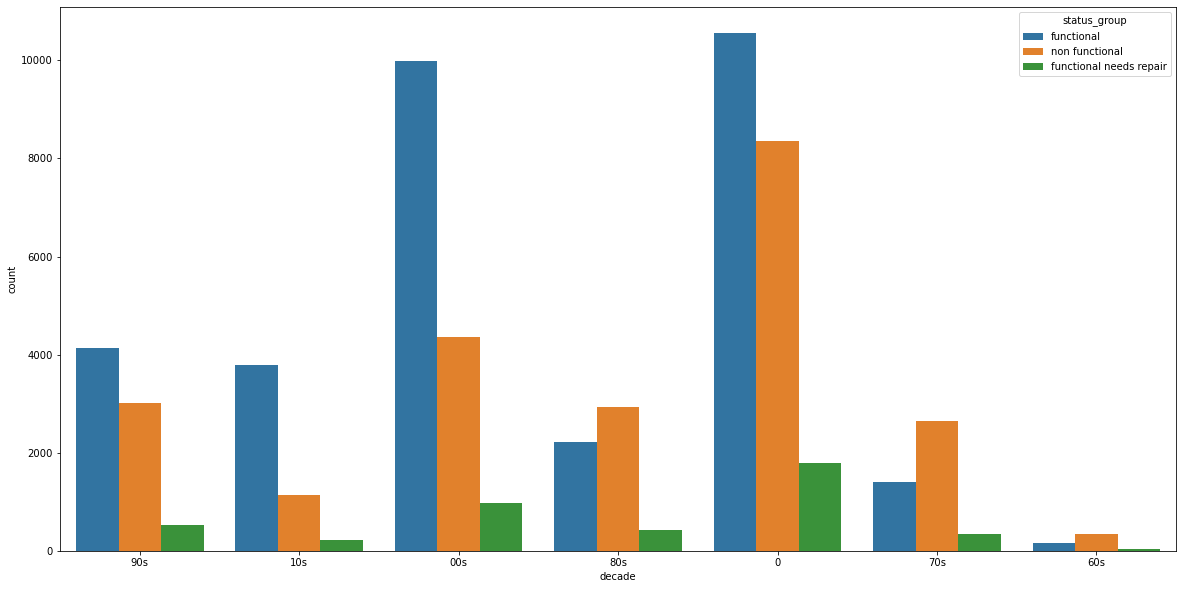

In [54]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

#### Dropping construction_year 

In [55]:
df.drop(columns=['construction_year'],inplace=True ) 
test_set.drop(columns=['construction_year'],inplace=True ) 

### Considering recorded by column

In [56]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

#### Dropping the column recorded_by

In [57]:
df.drop(columns=['recorded_by'],inplace=True ) 
test_set.drop(columns=['recorded_by'],inplace=True ) 

### Considering column installer column


#### Filling null values with unknown 

In [58]:
df['installer'].fillna(value='Unknown',inplace=True) 
test_set['installer'].fillna(value='Unknown',inplace=True) 

In [59]:
df['installer'].value_counts().head(100).sum()

47237

#### Filling 0 values with unknown 

In [60]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True)

#### Replacing the spelling mistakes and collect same categories in same name 

In [61]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

#### Replacing the spelling mistakes and collect same categories in same name in test set

In [62]:
test_set['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

test_set['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
test_set['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

test_set['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

test_set['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

test_set['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

test_set['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

test_set['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
test_set['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

test_set['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

test_set['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

test_set['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

test_set['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

#### Continuosly replacing spelling mistakes and getting together values

In [63]:
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [64]:
test_set['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
test_set['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
test_set['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
test_set['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
test_set['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
test_set['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
test_set['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
test_set['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
test_set['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
test_set['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [65]:
df['installer'].value_counts().head(20)

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

#### Creating new dataframe which just pick our desired values 

In [66]:
df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

####  To make new categorizes, creating new column 

In [67]:
df['installer_cat'] = df['installer']

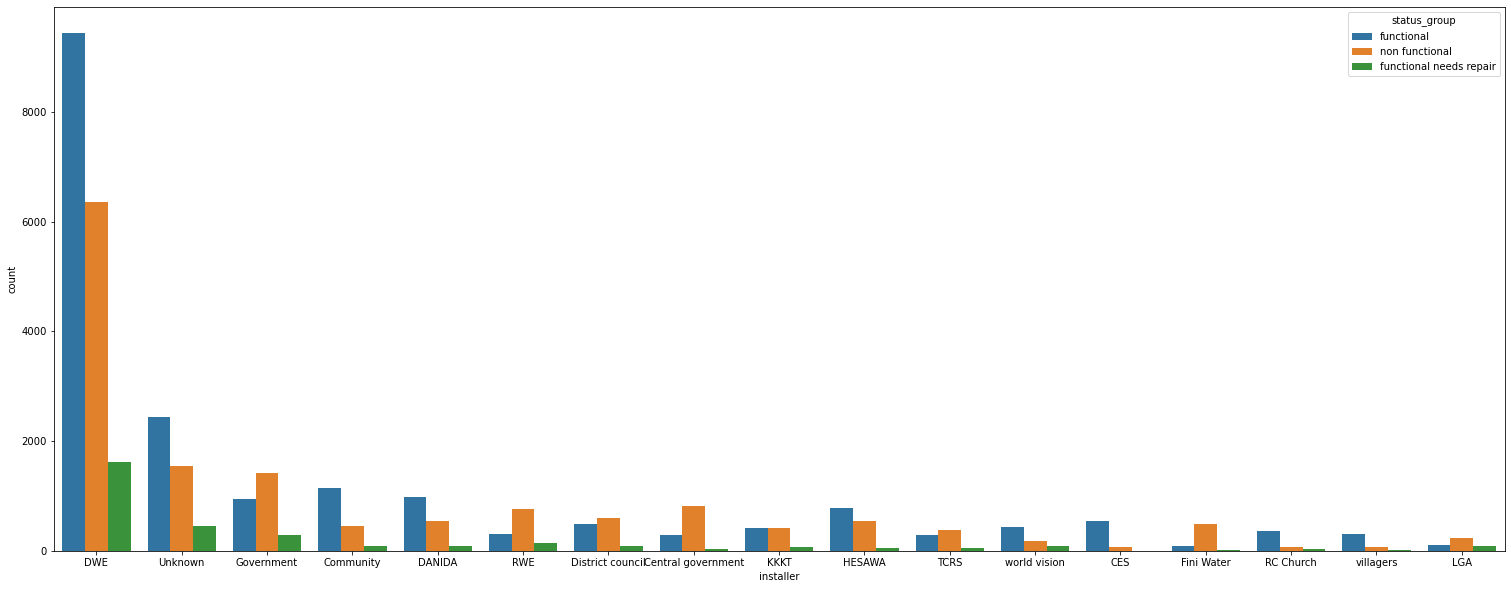

In [68]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data= df_installer)

#### Converting the values which has less than 400 value counts to others

In [69]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

#### Converting the values which has less than 400 value counts to others 

In [70]:
test_set['installer_cat'] = test_set['installer']

In [71]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


test_set.loc[~test_set["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

In [72]:
df["installer_cat"].value_counts()

Others                22593
DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
Fini Water              593
RC Church               461
villagers               408
LGA                     408
Name: installer_cat, dtype: int64

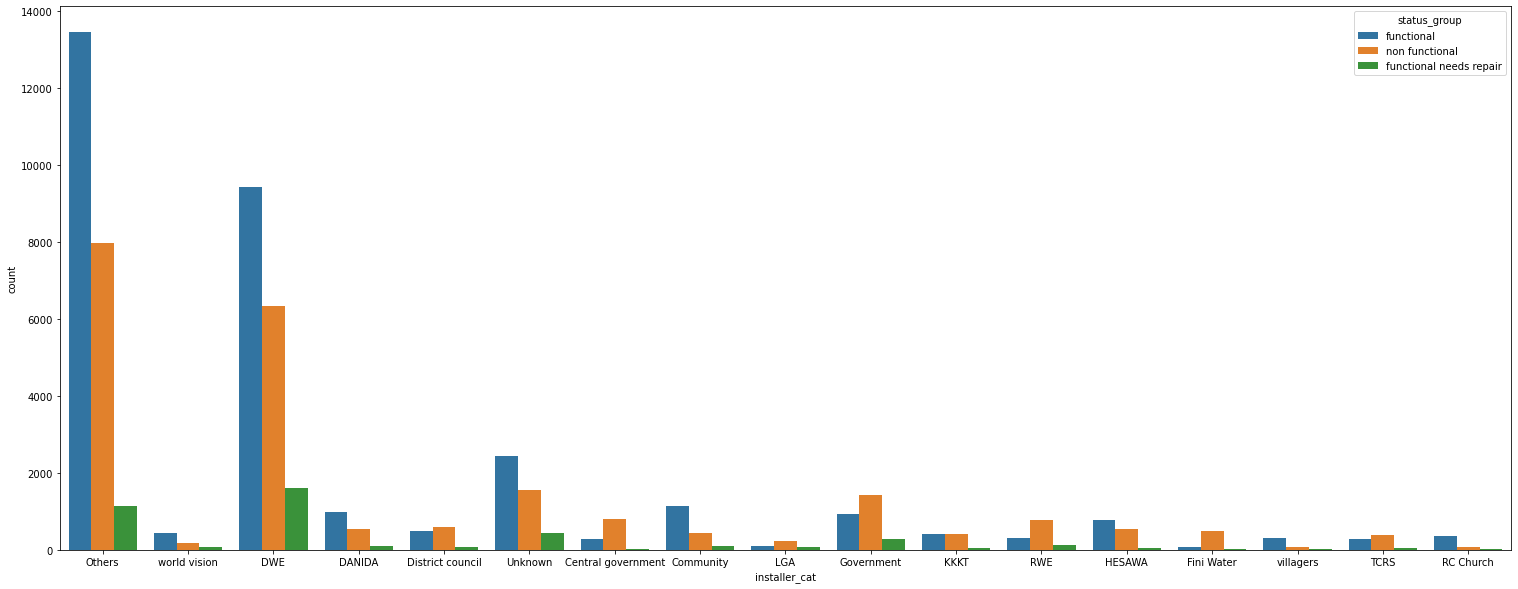

In [73]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer_cat', hue="status_group", data=df)

#### Droping installer column in training set and test set 

In [74]:
df.drop(columns=['installer'],inplace=True )
test_set.drop(columns=['installer'],inplace=True )

### Considering funder 

#### Filling 0 and null values with unknown 

In [75]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)


In [76]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [77]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

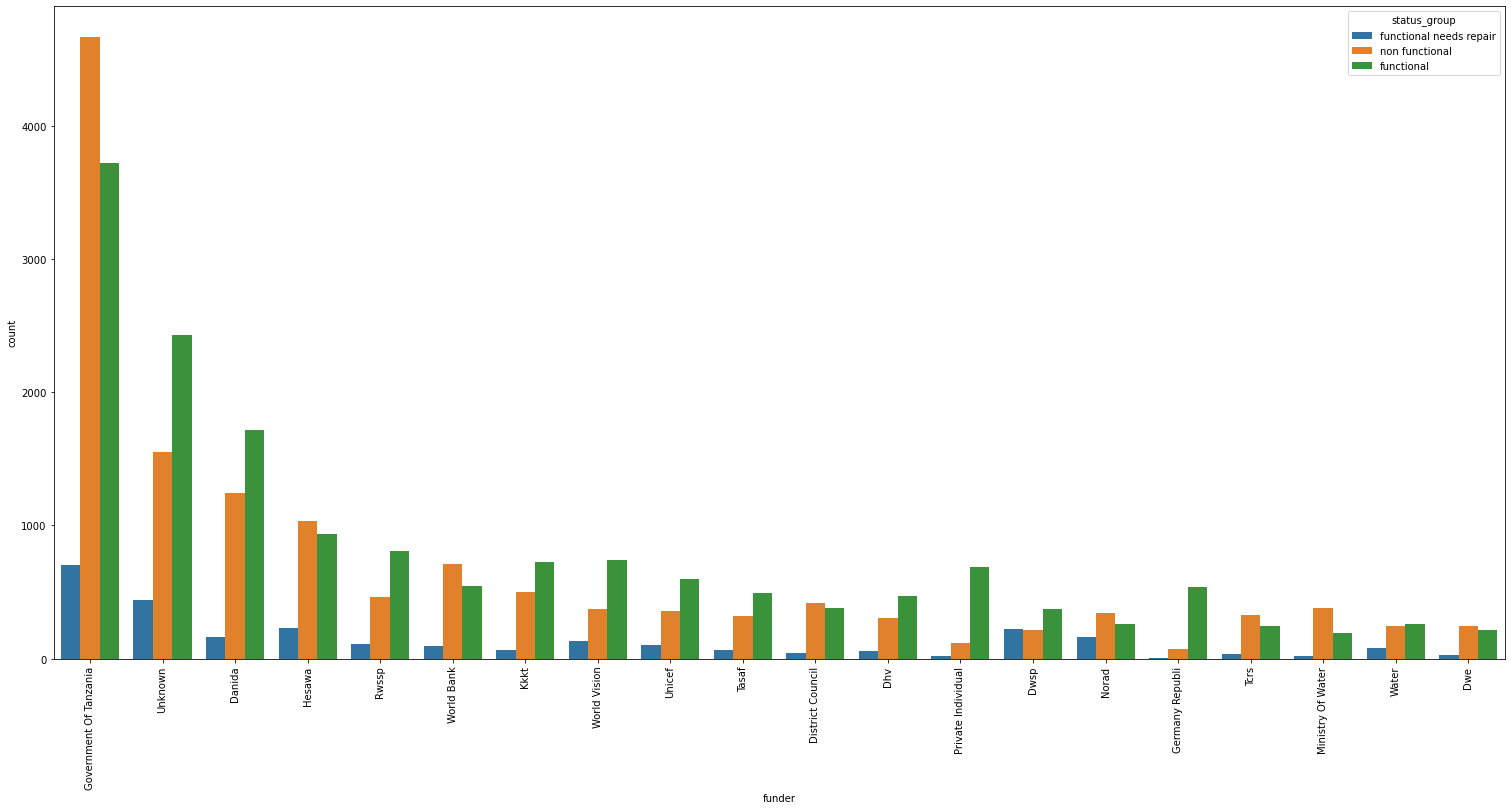

In [78]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### To collect values together 

In [79]:
df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

#### To collect values together in test set

In [80]:
test_set['funder_cat'] = test_set['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

test_set.loc[~test_set["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

#### Dropping funder column training set and test set 

In [81]:
df.drop(columns=['funder'],inplace=True )
test_set.drop(columns=['funder'],inplace=True )

### Considering longitude column

#### To identify the outliers

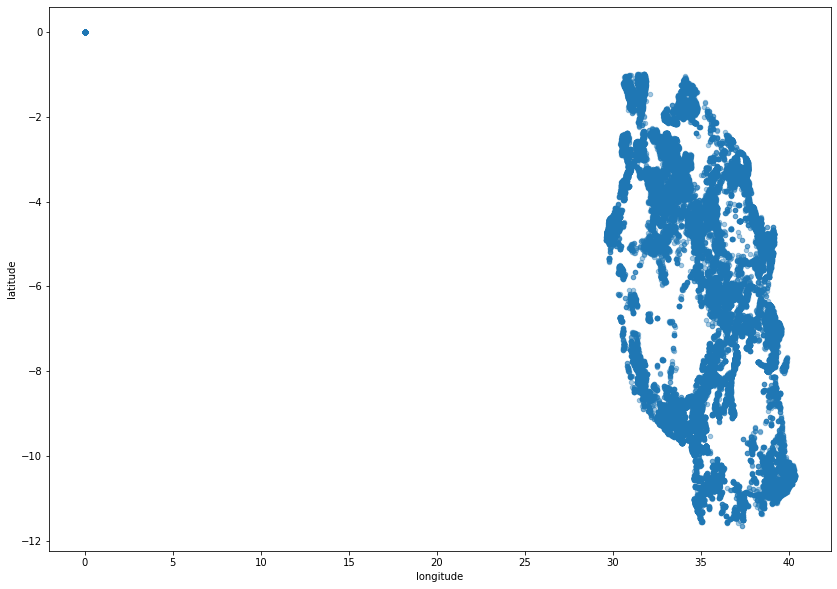

In [82]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);

In [83]:
df.loc[df['longitude']==0] 

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,functional,0.0,2013-02-10,0,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,non functional,0.0,2011-08-01,0,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,functional,0.0,2013-01-30,0,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,non functional,0.0,2013-01-17,0,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,functional needs repair,0.0,2012-10-29,0,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011-07-18,0,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,functional,0.0,2013-01-22,0,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,functional needs repair,0.0,2011-07-19,0,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,functional,0.0,2013-01-22,0,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


#### To find the non-zero values mean 

In [84]:
df.loc[df['longitude']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000


#### Replacing unknown longitude with mean

In [85]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [86]:
test_set.loc[test_set['longitude']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population
count,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000
mean,37162.759953,333.077239,675.949559,35.143114,-5.865223,0.428264,15.054957,5.727993,189.960120
std,21345.366618,2549.853999,692.064490,2.614986,2.804318,8.296237,17.454498,9.801944,475.729464
min,10.000000,0.000000,-57.000000,29.612776,-11.564592,0.000000,1.000000,0.000000,0.000000
25%,18733.000000,0.000000,0.000000,33.242062,-8.569461,0.000000,5.000000,2.000000,0.000000
50%,37375.000000,0.000000,388.000000,35.011381,-5.180883,0.000000,12.000000,3.000000,30.000000
75%,55762.000000,30.000000,1320.000000,37.258894,-3.366969,0.000000,17.000000,5.000000,230.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-0.998752,669.000000,99.000000,80.000000,11469.000000


#### Replacing unknown longitude with mean

In [87]:
test_set['longitude'].replace(to_replace = 0 , value =35.14, inplace=True)

### Considering wpt_name / scheme_name / id/ region/ region_code columns 

In [88]:
df['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

In [89]:
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [90]:
df.duplicated(subset='id', keep='first').sum()

0

In [91]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [92]:
test_set.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [93]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

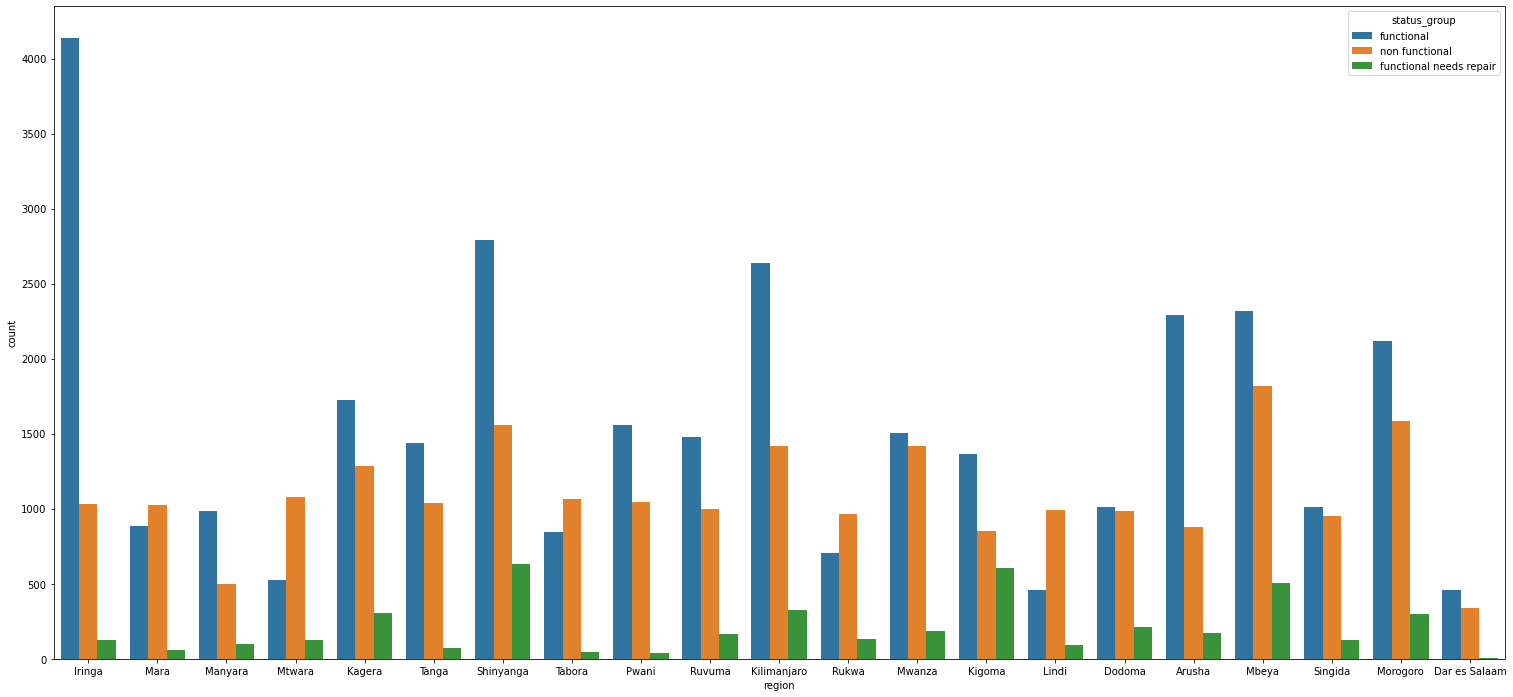

In [94]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

#### Considering the high amount iringa area 

In [95]:
df_iringa =df.loc[df['region']=='Iringa']

In [96]:
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  gps_height  \
water_quality status_group                                                     
coloured      functional                        1              1           1   
              non functional                    1              1           1   
salty         functional                       19             19          19   
              non functional                    8              8           8   
soft          functional                     4120           4120        4120   
              functional needs repair         123            123         123   
              non functional                  983            983         983   
unknown       functional                        1              1           1   
              non functional                   38             38          38   

                                       longitude  latitude  num_private  \
water_quality status_group                                                
coloured      functional                       1         1            1   
              non functional                   1         1            1   
salty         functional                      19        19           19   
              non functional                   8         8            8   
soft          functional                    4120      4120         4120   
              functional needs repair        123       123          123   
              non functional                 983       983          983   
unknown       functional                       1         1            1   
              non functional                  38        38           38   

                                       basin  subvillage  region  \
water_quality status_group                                         
coloured      functional                   1           1       1   
              non functional               1           1       1   
salty         functional                  19          19      19   
              non functional               8           8       8   
soft          functional                4120        4120    4120   
              functional needs repair    123         123     123   
              non functional             983         983     983   
unknown       functional                   1           1       1   
              non functional              38          38      38   

                                       district_code   lga  ward  population  \
water_quality status_group                                                     
coloured      functional                           1     1     1           1   
              non functional                       1     1     1           1   
salty         functional                          19    19    19          19   
              non functional                       8     8     8           8   
soft          functional                        4120  4120  4120        4120   
              functional needs repair            123   123   123         123   
              non functional                     983   983   983         983   
unknown       functional                           1     1     1           1   
              non functional                      38    38    38          38   

                                       public_meeting  permit  \
water_quality status_group                                      
coloured      functional                            1       1   
              non functional                        1       1   
salty         functional                           19      19   
              non functional                        8       8   
soft          functional                         4118    4117   
              functional needs repair             123     123   
              non functional                      983     983   
unknown       functional                            1       1   
              non functional                       3

### Considering amount_tsh column 

In [97]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [98]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [99]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [100]:
test_set['amount_tsh'].value_counts()/test_set['amount_tsh'].count()

0.0         0.701010
500.0       0.051987
50.0        0.042492
1000.0      0.024916
20.0        0.023502
              ...   
14000.0     0.000067
0.2         0.000067
70000.0     0.000067
100000.0    0.000067
2800.0      0.000067
Name: amount_tsh, Length: 68, dtype: float64

In [101]:
df.drop(columns=['amount_tsh'],inplace=True )

In [102]:
test_set.drop(columns=['amount_tsh'],inplace=True )

### Considering gps_height column 

In [103]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [104]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

In [105]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: gps_height, Length: 2428, dtype: float64

### Considering population column 

In [106]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [107]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,gps_height,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


#### To identify the  mean and median of population without 0 

In [108]:
df.loc[df['population']!=0].describe() 

,gps_height,longitude,latitude,num_private,district_code,population
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000


#### Changing 0's to mean 

In [109]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) 

In [110]:
test_set.loc[df['population']!=0].describe() 

,gps_height,longitude,latitude,num_private,district_code,population
count,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000
mean,655.147609,35.143018,-5.684724e+00,0.415084,5.626397,184.114209
std,691.261185,2.574431,2.940803e+00,8.167910,9.673842,469.499332
min,-57.000000,29.612776,-1.156459e+01,0.000000,0.000000,0.000000
25%,0.000000,33.326568,-8.443970e+00,0.000000,2.000000,0.000000
50%,344.000000,35.140000,-5.049750e+00,0.000000,3.000000,20.000000
75%,1308.000000,37.196594,-3.320594e+00,0.000000,5.000000,220.000000
max,2777.000000,40.325016,-2.000000e-08,669.000000,80.000000,11469.000000


In [111]:
test_set['population'].replace(to_replace = 0 , value =184, inplace=True) 

In [112]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,gps_height,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


### Considering date_recorded column 

In [113]:
df.drop(columns=['date_recorded'],inplace=True )
test_set.drop(columns=['date_recorded'],inplace=True )

### Considering num_private column 

In [114]:
df.drop(columns=['num_private'],inplace=True )
test_set.drop(columns=['num_private'],inplace=True )

### Considering basin column

In [115]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

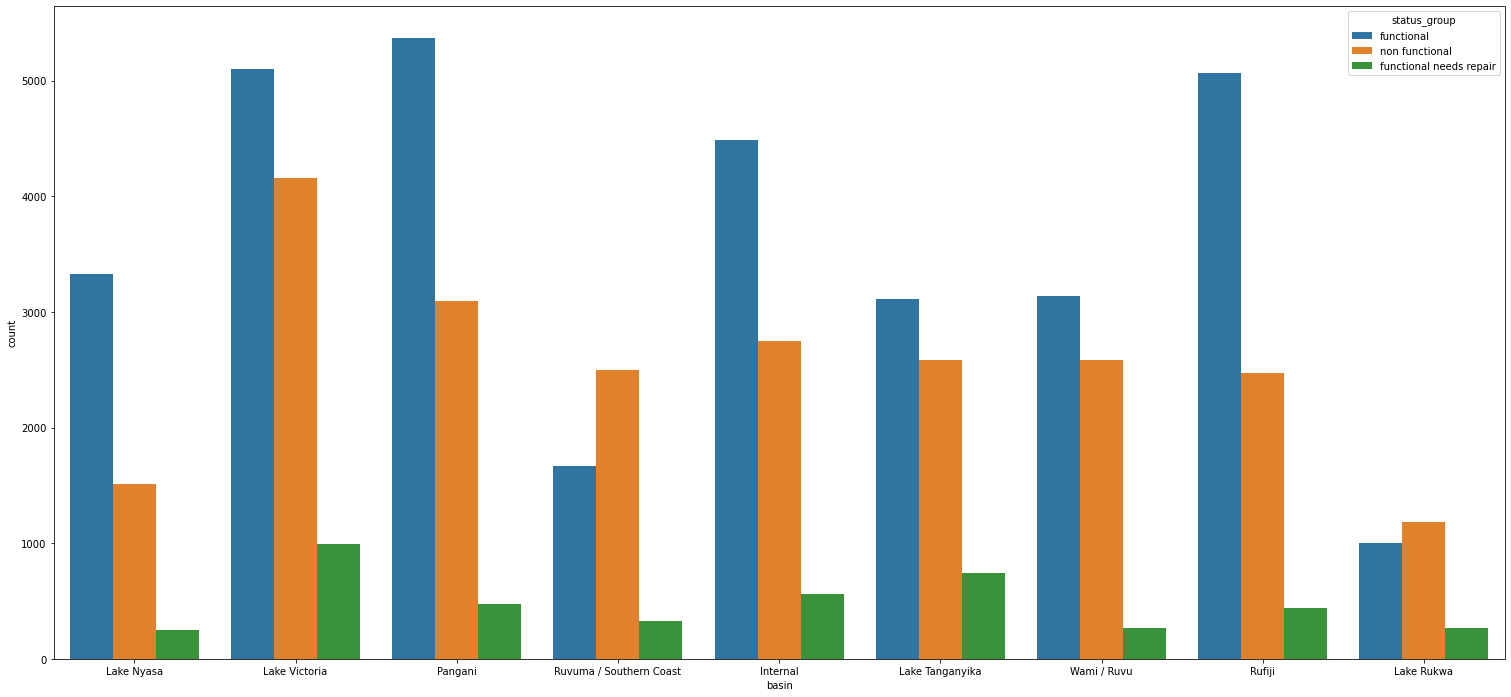

In [116]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

### Considering subvillage column 

In [117]:
df['subvillage'].nunique()

19287

In [118]:
df.drop(columns=['subvillage'],inplace=True )
test_set.drop(columns=['subvillage'],inplace=True )

### Considering district_code column 

In [119]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

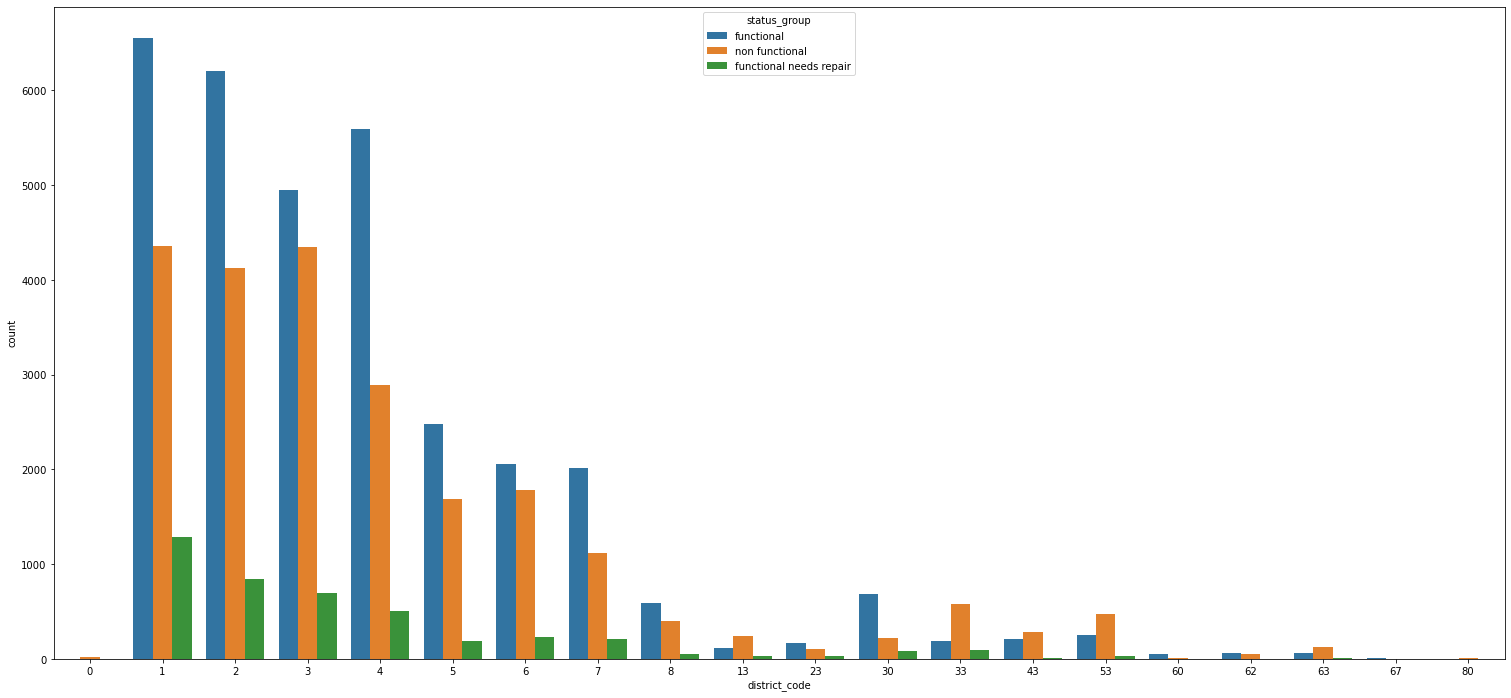

In [120]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=df)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   lga                    59400 non-null  object 
 8   ward                   59400 non-null  object 
 9   population             59400 non-null  int64  
 10  public_meeting         56066 non-null  object 
 11  permit                 56344 non-null  object 
 12  extraction_type_group  59400 non-null  object 
 13  management             59400 non-null  object 
 14  payment                59400 non-null  object 
 15  wa

### Considering public_meeting column 

In [122]:
df['public_meeting'].value_counts()


True     51011
False     5055
Name: public_meeting, dtype: int64

#### Filling null value with most common value

In [123]:
df['public_meeting'].fillna(value=True,inplace=True)

In [124]:
test_set['public_meeting'].value_counts()

True     12738
False     1291
Name: public_meeting, dtype: int64

In [125]:
test_set['public_meeting'].fillna(value=True,inplace=True)

### Considering permit column 

In [126]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

#### Filling value with most common value 

In [127]:
df['permit'].fillna(value=True, inplace=True)

In [128]:
test_set['permit'].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

#### Filling value with most common value 

In [129]:
test_set['permit'].fillna(value=True, inplace=True)

#### Encoding the target value to numeric value 

In [130]:
target_status_group = {'functional':0, 'non functional': 2, 'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [131]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [132]:
df

,status_group,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,0,1212,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,0,0,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


# Modelling 

#### At the next steps maybe needed to drop some columns so df assigned another dataframe to protect original 

In [133]:
df1= df.copy() 


In [134]:
df1

,status_group,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,0,1212,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,0,0,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


#### Dropping the column lga and ward in training test and test test 

In [135]:
df1.drop(columns=['lga','ward'],inplace=True ) 
test_set.drop(columns=['lga','ward'],inplace=True ) 

#### Converting permit column boolean to numeric  

In [136]:
df1['permit'] = df1['permit'].astype(bool).astype(int)
test_set['permit'] = test_set['permit'].astype(bool).astype(int)

#### Converting public_meeting column boolean to numeric

In [137]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)
test_set['public_meeting'] = test_set['public_meeting'].astype(bool).astype(int)

#### Assigning categorical columns

In [138]:
categorical_columns = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

#### Assigning numeric columns

In [139]:
numeric_columns = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [140]:
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

#### Assign target 

In [141]:
target='status_group'

In [142]:
df_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info'])

In [143]:
test_set.shape

(14850, 19)

In [144]:
t_test= test_set.copy() 

#### Importing necessary libraries for modelling 

In [145]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, balanced_accuracy_score
 

In [146]:
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

#### Choosing train-test splits 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

## Random forest classifier 

In [148]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(categorical_columns)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, numeric_columns),
                    ('cat', cat_transformer, categorical_columns)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=600,max_depth=22,random_state=0)

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

C:\Users\P.Thukaraka\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Accuracy:
TRAIN: 0.9632010339081046
TEST: 0.835016835016835

Balanced Accuracy:
TRAIN: 0.9178927855359819
TEST: 0.6951889733951102


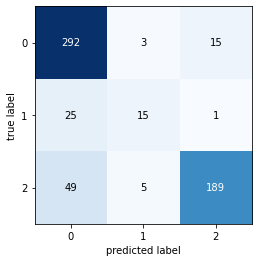

In [149]:
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [150]:
pred_test = pipe.predict(test_set)
test_set['status_group']=pred_test

In [151]:
test_set

,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat,status_group
0,1996,35.290799,-4.059696,Internal,Manyara,3,321,1,1,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,10s,Others,Others,0
1,1569,36.656709,-3.309214,Pangani,Arusha,2,300,1,1,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,00s,DWE,Government Of Tanzania,0
2,1567,34.767863,-5.004344,Internal,Singida,2,500,1,1,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,10s,Unknown,Others,0
3,267,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,43,250,1,1,other,vwc,unknown,soft,dry,shallow well,other,80s,Others,Others,2
4,1260,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,3,60,1,1,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,00s,Others,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,34,38.852669,-6.582841,Wami / Ruvu,Pwani,1,20,1,1,mono,vwc,never pay,soft,enough,river,communal standpipe,80s,Others,Danida,2
14846,0,37.451633,-5.350428,Pangani,Tanga,7,2960,1,0,nira/tanira,vwc,pay annually,salty,insufficient,shallow well,hand pump,90s,Others,Others,0
14847,1476,34.739804,-4.585587,Internal,Singida,2,200,1,1,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,10s,Unknown,Others,0
14848,998,35.432732,-10.584159,Lake Nyasa,Ruvuma,2,150,1,1,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,00s,DWE,Others,0


In [152]:
for i in range (len(test_set['status_group'])):
    if test_set['status_group'][i]==0:
            test_set['status_group'][i] = "functional" 
    elif  test_set['status_group'][i]==1:
        test_set['status_group'][i] = "functional needs repair" 
    elif  test_set['status_group'][i]==2:
        test_set['status_group'][i] = "non functional" 

<ipython-input-152-e9f92d273355>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['status_group'][i] = "functional"
C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [153]:
submission_df = pd.read_csv("C:/Users/P.Thukaraka/Downloads/SubmissionFormat.csv")
submission_df['status_group']=test_set['status_group']
submission_df.to_csv('Submission_RFC.csv',sep=',', index=False)

## XGBoost

In [154]:
X_train

,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
5442,0,31.160910,-1.399004,Lake Victoria,Kagera,1,281,1,1,gravity,other,pay annually,soft,enough,river,communal standpipe,0,DWE,Others
38271,0,37.340533,-6.346205,Wami / Ruvu,Morogoro,1,430,1,1,other,vwc,never pay,soft,insufficient,shallow well,other,80s,Others,Others
12610,1162,33.054851,-2.104719,Lake Victoria,Mwanza,1,400,1,1,nira/tanira,vwc,never pay,soft,insufficient,machine dbh,other,10s,DWE,World Bank
57211,343,37.889157,-6.860597,Wami / Ruvu,Morogoro,2,1,1,1,gravity,vwc,never pay,unknown,unknown,machine dbh,communal standpipe,70s,DWE,Others
4815,0,33.078467,-5.095823,Lake Tanganyika,Tabora,3,281,1,1,nira/tanira,vwc,never pay,soft,dry,shallow well,hand pump,0,District council,District Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,327,36.367112,-8.774761,Rufiji,Morogoro,4,255,1,1,gravity,wug,pay monthly,soft,enough,river,communal standpipe,90s,DWE,Dhv
38158,1743,34.531524,-9.769604,Lake Nyasa,Iringa,5,35,1,0,gravity,vwc,pay annually,soft,seasonal,spring,communal standpipe,80s,DANIDA,Danida
860,-13,38.974416,-5.420823,Pangani,Tanga,5,1000,0,0,other,private operator,never pay,soft,insufficient,shallow well,other,00s,Others,Others
15795,0,34.316586,-3.107161,Lake Victoria,Shinyanga,6,281,1,1,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,Others,Rwssp


In [155]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline, Pipeline
xgb = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)


pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


 

C:\Users\P.Thukaraka\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\P.Thukaraka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:43:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:
TRAIN: 0.8917117300955685
TEST: 0.8249158249158249

Balanced Accuracy:
TRAIN: 0.7930168611874482
TEST: 0.6884408871966059


In [156]:
y_test = pipe.predict(t_test)


In [157]:
 
t_test['status_group']=y_test

In [158]:
for i in range (len(t_test['status_group'])):
    if t_test['status_group'][i]==0:
            t_test['status_group'][i] = "functional" 
    elif  t_test['status_group'][i]==1:
        t_test['status_group'][i] = "functional needs repair" 
    elif  t_test['status_group'][i]==2:
        t_test['status_group'][i] = "non functional" 

<ipython-input-158-3816bdfe4f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_test['status_group'][i] = "functional"
C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [159]:
submission_df = pd.read_csv("C:/Users/P.Thukaraka/Downloads/SubmissionFormat.csv")
submission_df['status_group']=t_test['status_group']
submission_df.to_csv('Submission_XGB.csv',sep=',', index=False)